***Importing Required Libraries Initially***

In [456]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

***Importing Data File From the Local Machine***

In [458]:
df1 = pd.read_csv(r'C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\Machine Learning Projects\Human Vital Signs based risk prediction Project\human_vital_signs_dataset_2024.csv')

In [459]:
df1 = df1[0:333]

***Inspection of Imported Data Table***

In [461]:
df1.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [462]:
df1.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

***For our study since, we only required the vital signs, which helps to diagnose the patient health condition, we remove all the general demographics, which are static***

In [464]:
df2 = df1.drop(['Patient ID', 'Timestamp', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_BMI'], axis = 'columns')
df2.columns


Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

***Inspection of Data Table, once we removed the static features.***

df2.info()

***All Independent features are in the numeric format, but the Risk category which is our dependent variable in the category form, we need to change it to numbers format, we are using the LabelEncoder for conversion to numbers***

***Importing LabelEncoder***

In [469]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

***Initializing the LabelEncoder Object and creating the new column***

In [471]:
label_encoder = LabelEncoder()
df2['Risk_Category'] = label_encoder.fit_transform(df2['Risk Category'])

***Inspecting the Encoder Labels with the category***

In [473]:
df2[['Risk Category', 'Risk_Category']].drop_duplicates()

,Risk Category,Risk_Category
0,High Risk,0
2,Low Risk,1


***Inspection of final columns***

In [475]:
df2.columns

Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP', 'Risk Category', 'Risk_Category'],
      dtype='object')

***Need to remove the additioanl column, since we already has label encoder column for Risk category***

In [477]:
df3 = df2.drop(['Risk Category'], axis = 1)
df3.columns

Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP', 'Risk_Category'],
      dtype='object')

***Final Inspection***

In [479]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Heart Rate                333 non-null    int64  
 1   Respiratory Rate          333 non-null    int64  
 2   Body Temperature          333 non-null    float64
 3   Oxygen Saturation         333 non-null    float64
 4   Systolic Blood Pressure   333 non-null    int64  
 5   Diastolic Blood Pressure  333 non-null    int64  
 6   Derived_HRV               333 non-null    float64
 7   Derived_Pulse_Pressure    333 non-null    int64  
 8   Derived_MAP               333 non-null    float64
 9   Risk_Category             333 non-null    int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 24.8 KB


***Understanding correlation between the Risk Categories and other features***

***Importing the Required Libraries***

In [482]:
import matplotlib.pyplot as plt

In [483]:
vital_signs = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP']

                          Correlation with Risk
Heart Rate                            -0.419245
Respiratory Rate                      -0.001453
Body Temperature                      -0.006305
Oxygen Saturation                      0.045093
Systolic Blood Pressure                0.003142
Diastolic Blood Pressure               0.120405
Derived_HRV                            0.047708
Derived_Pulse_Pressure                -0.062121
Derived_MAP                            0.105216


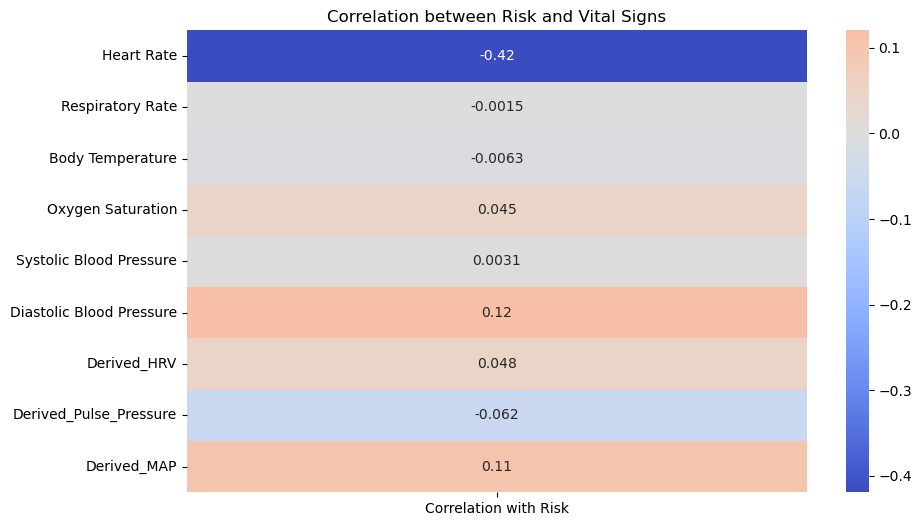

In [484]:
correlation_results = {}

for vital_sign in vital_signs:
    correlation = df3[vital_sign].corr(df3['Risk_Category'])  # Pearson correlation by default
    correlation_results[vital_sign] = correlation

# Convert results to a DataFrame for easier viewing
correlation_df = pd.DataFrame(correlation_results, index=['Correlation with Risk']).T

# Display the correlation table
print(correlation_df)

# Optional: Visualize the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation between Risk and Vital Signs')
plt.show()

***As per the Dataset following are findings***

1) Heart Rate, Diostolic Blood Pressure and Derived MAP are directly correlated with the High Risk, means, when this Vital signs increases the risk is increasing.

2) Systolic blood pressure, Pulse Pressure, Derived HRV, Respiration,Temperature, Oxygen Saturation either associated with low risk or completely not asociated with the risk.

In [486]:
df3.columns

Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP', 'Risk_Category'],
      dtype='object')

In [487]:
df3.shape

(333, 10)

In [488]:
target = df3['Risk_Category']

In [489]:
target.shape

(333,)

In [490]:
df4 = df3.drop(['Risk_Category'], axis = 'columns')
df4.shape
df4.columns

Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Derived_HRV', 'Derived_Pulse_Pressure',
       'Derived_MAP'],
      dtype='object')

In [491]:
df4.shape

(333, 9)

In [492]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [493]:
from sklearn.model_selection import train_test_split

In [494]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, test_size=0.2, random_state=43)

In [495]:
X_train.head()

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Derived_HRV,Derived_Pulse_Pressure,Derived_MAP
3,99,16,36.654748,95.011801,118,72,0.064475,46,87.333333
56,91,15,36.689590,98.886704,130,73,0.138943,57,92.000000
159,66,16,36.410757,97.496836,124,72,0.120530,52,89.333333
215,94,18,37.372735,95.428172,111,88,0.069078,23,95.666667
65,60,13,37.065107,99.026017,125,76,0.052775,49,92.333333


In [496]:
y_train.head()

3      0
56     0
159    1
215    0
65     1
Name: Risk_Category, dtype: int32

In [497]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [498]:
model.score(X_test, y_test)

0.6119402985074627

In [499]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [500]:
#Logistic Regression
l_scores = cross_val_score(LogisticRegression(), df4, target)
print(l_scores)
print(np.average(l_scores))

[0.56716418 0.64179104 0.71641791 0.71212121 0.59090909]
0.6456806874717322


C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [501]:
#Decision Tree
d_scores = cross_val_score(DecisionTreeClassifier(), df4, target, cv = 5)
print(d_scores)
print(np.mean(d_scores))

[0.62686567 0.67164179 0.6119403  0.62121212 0.56060606]
0.6184531886024424


In [502]:
#Support Vector Machine
s_scores = cross_val_score(SVC(), df4, target)
print(s_scores)
print(np.mean(s_scores))

[0.53731343 0.65671642 0.71641791 0.71212121 0.57575758]
0.6396653098145635


In [503]:
#Random Forest
r_scores = cross_val_score(RandomForestClassifier(n_estimators = 50), df4, target)
print(r_scores)
print(np.mean(r_scores))

[0.6119403  0.59701493 0.53731343 0.60606061 0.62121212]
0.594708276797829


***Since Random Forest got 63 percentage of score, we are using it to predict the model***

In [505]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

In [506]:
rand_model.fit(X_train, y_train)

RandomForestClassifier()

In [507]:
rand_model.score(X_test, y_test)

0.6119402985074627

In [508]:
y_train_pred_series = pd.Series(rand_model.predict(X_train), index=X_train.index, name='predictions')
final_prediction = pd.concat([X_train, y_train_pred_series], axis=1)
final_prediction.head()

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Derived_HRV,Derived_Pulse_Pressure,Derived_MAP,predictions
3,99,16,36.654748,95.011801,118,72,0.064475,46,87.333333,0
56,91,15,36.689590,98.886704,130,73,0.138943,57,92.000000,0
159,66,16,36.410757,97.496836,124,72,0.120530,52,89.333333,1
215,94,18,37.372735,95.428172,111,88,0.069078,23,95.666667,0
65,60,13,37.065107,99.026017,125,76,0.052775,49,92.333333,1
